<a href="https://colab.research.google.com/github/RanjanRaj07/Data-Science-Internship/blob/main/Task2/ICC_CricketWorldCup2019Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cricket Player Performance Prediction using machine learning
---

The Dataset consists of Batsman_Data , Bowler_data , Ground_Averages , ODI_Matche_Totals , ODI_Match_Results and WC_Players for the matches played after 2012. It is good to analyze the matches played in England and Wales as these were the venue for the 2019 world cup.

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Batsman_data = pd.read_csv('Batsman_Data.csv')
Bowler_data = pd.read_csv('Bowler_data.csv')
Ground_data = pd.read_csv('Ground_Averages.csv')
ODI_scores = pd.read_csv('ODI_Match_Totals.csv')
ODI_Results = pd.read_csv('ODI_Match_Results.csv')
WC_Players = pd.read_csv('WC_players.csv')

## Analysing the data stored in each files

In [ ]:
Ground_data.sample(5)

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
75,"Headingley, Leeds - England",2014-2019,6,5,0,0,3262,83,3351,39.30,5.84
16,"Manuka Oval, Canberra - Australia",2013-2016,7,7,0,0,4226,110,4026,38.41,6.29
78,"Tony Ireland Stadium, Townsville - Australia",2014-2014,2,2,0,0,930,33,1118,28.18,4.99
5,"Nehru Stadium, Kochi - India",2013-2014,3,3,0,0,1384,46,1567,30.08,5.29
92,"Sinhalese Sports Club Ground, Colombo - Sri Lanka",2017-2017,1,1,0,0,490,19,567,25.78,5.18


In [ ]:
print('Total number of ground details for ODI matches:',Ground_data.shape[0])

Total number of ground details for ODI matches: 106


In [ ]:
ODI_Results.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [ ]:
print('Total number of ODI match result details:',ODI_Results.shape[0])

Total number of ODI match result details: 1322


In [ ]:
ODI_scores.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [ ]:
print('Total number of ODI score details:',ODI_scores.shape[0])

Total number of ODI score details: 1296


In [ ]:
Batsman_data.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [ ]:
print('Total batsman detail:',Batsman_data.shape[0])

Total batsman detail: 11149


In [ ]:
Bowler_data.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [ ]:
print('Total bowlers details:',Bowler_data.shape[0])

Total bowlers details: 11118


In [ ]:
WC_Players.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


In [ ]:
print('Total WC players data:',WC_Players.shape[0])

Total WC players data: 152


# Ground Analysis
---
## Analyzing the previous records we can consider the venues of England and wales

In [ ]:
WC_venues = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester","Edgbaston, Birmingham","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]

In [ ]:
WC_Ground_stats = []
ODI_Grounds = ODI_scores.Ground
for i in ODI_Grounds:
  for j in WC_venues:
    if i in j:
      WC_Ground_stats.append((i,j))

In [ ]:
Ground_names = dict(set(WC_Ground_stats))
def Full_Ground_names(value):
  return Ground_names[value]
Ground_names

{'Cardiff': 'Sophia Gardens, Cardiff',
 'Leeds': 'Headingley, Leeds',
 'Southampton': 'Rose Bowl, Southampton',
 'The Oval': 'The Oval, London',
 'Nottingham': 'Trent Bridge, Nottingham',
 "Lord's": "Lord's, London",
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 'Birmingham': 'Edgbaston, Birmingham',
 'Manchester': 'Old Trafford, Manchester',
 'Bristol': 'County Ground, Bristol'}

No Matches in County Ground, Taunton

In [ ]:
WC_grndhist = ODI_scores[ODI_scores.Ground.isin([Ground[0] for Ground in WC_Ground_stats])]
WC_grndhist["Ground"] = WC_grndhist.Ground.apply(Full_Ground_names)
WC_grndhist.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
74,557,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5
75,844,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1
76,558,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5
77,845,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1
78,559,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5


         index  Country
0      England       68
1    Australia       20
2     Pakistan       18
3        India       17
4     SriLanka       17
5    Newzealad       14
6  SouthAfrica       10
7   WestIndies        8
8   Bangladesh        4


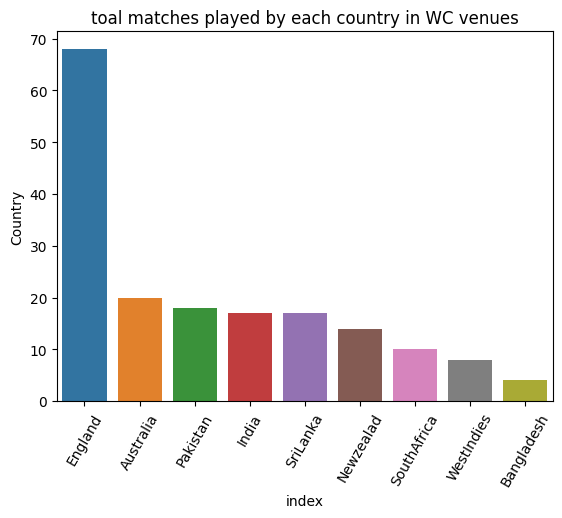

In [ ]:
#Total maches played by each country
Team_matches = WC_grndhist.Country.value_counts().reset_index()
plt.ylabel("Macthes played")
plt.xlabel("Country")
plt.xticks(rotation=60)
sns.barplot(x="index", y="Country", data=Team_matches).set_title("toal matches played by each country in WC venues")
print(Team_matches)

As expected England being the home team has the maximum matches played in the WC venues and has the advantage

In [ ]:
#check for the win and draw in ground
WC_grndhist.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
-        2
Name: Result, dtype: int64

won     79
lost    77
n/r     14
tied     4
Name: Result, dtype: int64

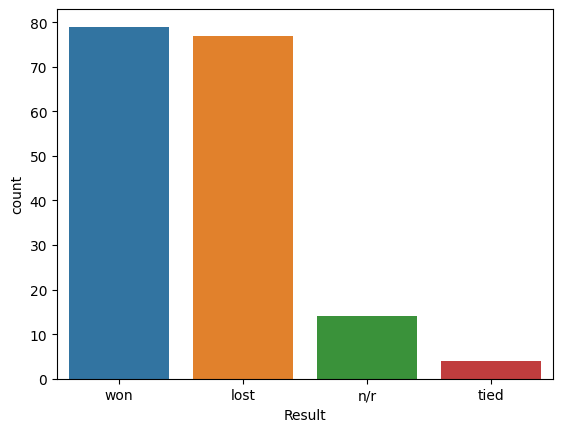

In [ ]:
#remove unknown data '-'
WC_grndhist = WC_grndhist[~WC_grndhist.Result.isin(["-"])]
sns.countplot(x=WC_grndhist['Result'])
WC_grndhist.Result.value_counts()

<Axes: xlabel='Country', ylabel='count'>

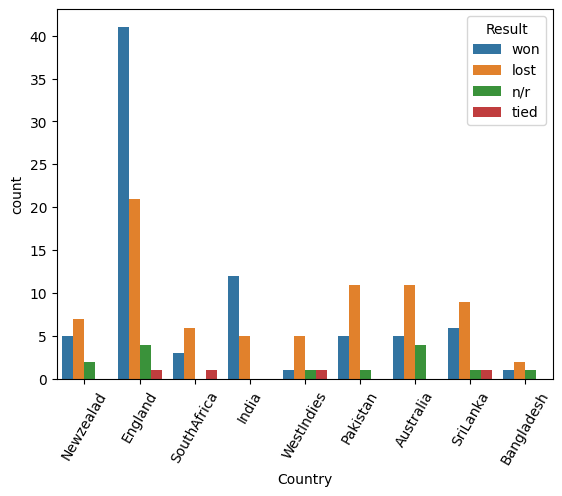

In [ ]:
plt.xticks(rotation=60)
sns.countplot(data=WC_grndhist, x='Country', hue='Result')

In [ ]:
#finding the winning percentages of each team
results = WC_grndhist[['Country','Result']]
results['count']=1
grnd_resperteam = results.groupby(['Country','Result']).aggregate(['sum'])
grnd_resperteam = grnd_resperteam.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()
grnd_resperteam.columns = ['Country','Result','Count']

Text(0.5, 0, 'Country - result')

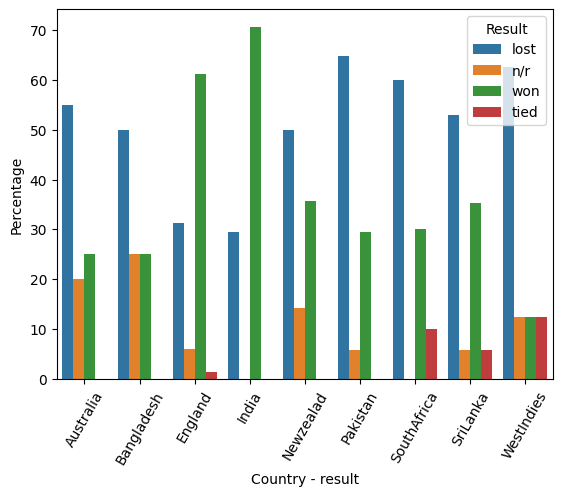

In [ ]:
plt.xticks(rotation=60)
sns.barplot(x='Country', y='Count', hue='Result', data=grnd_resperteam)
plt.ylabel('Percentage')
plt.xlabel('Country - result')

India and England has the highest winning percentage from the given dataset. <br>
Pakistan and SouthAfrica has the highest losing percentage.

<Axes: xlabel='Inns', ylabel='count'>

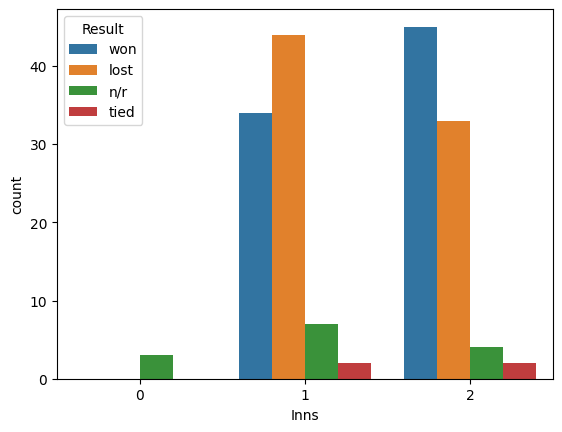

In [ ]:
#winning and loosing with respect to Innings
sns.countplot(x='Inns', data=WC_grndhist, hue='Result')

Text(0, 0.5, 'Winning percentage')

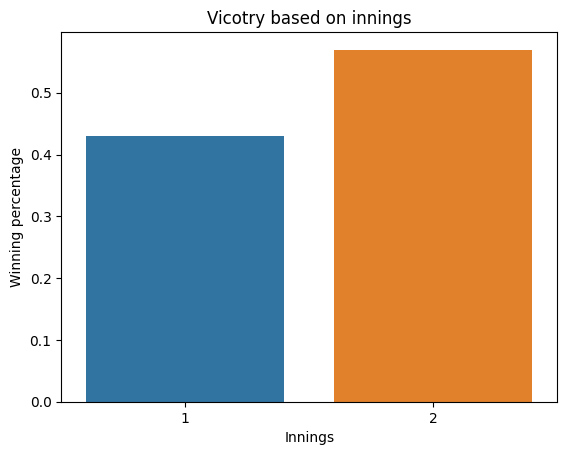

In [ ]:
Inning_wins = WC_grndhist[WC_grndhist.Result=='won'].Inns.value_counts(normalize=True).reset_index()
sns.barplot(x='index',y='Inns',data=Inning_wins).set_title('Vicotry based on innings')
plt.xlabel('Innings')
plt.ylabel('Winning percentage')

so this shows that bowling first favors victory in over all WC venues.

In [ ]:
#divide the winning possibility based pitches for more accurate details
Pitch_innings = WC_grndhist[WC_grndhist.Result=="won"][["Inns","Ground"]]
Pitch_innings['Count']=1
Pitch_innings = Pitch_innings.groupby(['Ground','Inns']).sum()
Pitch_innings = Pitch_innings.groupby(level=0).apply(lambda x:100*x/ float(x.sum())).reset_index()
Pitch_innings.columns = ['Ground','Inns','Wins']
Pitch_innings.head()

,Ground,Inns,Wins
0,"County Ground, Bristol",1,33.333333
1,"County Ground, Bristol",2,66.666667
2,"Edgbaston, Birmingham",1,41.666667
3,"Edgbaston, Birmingham",2,58.333333
4,"Headingley, Leeds",1,40.000000


Text(0.5, 1.0, 'Innings vs victory of each WC ground')

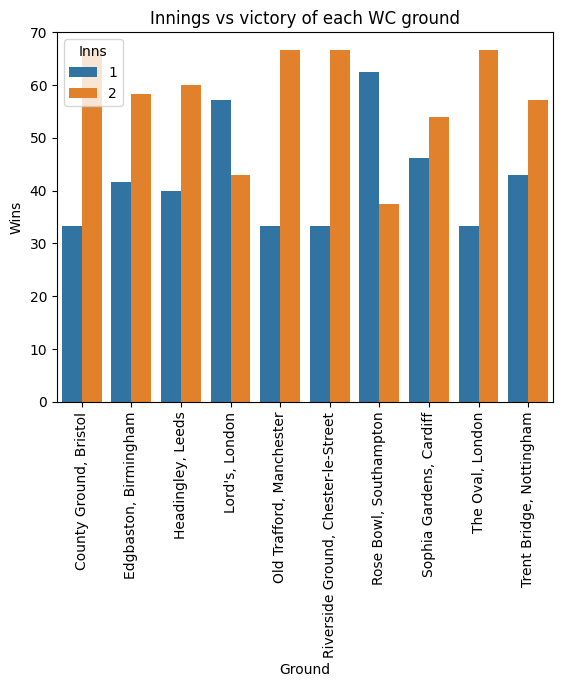

In [ ]:
# plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='Ground',y='Wins',hue='Inns',data=Pitch_innings).set_title('Innings vs victory of each WC ground')

Except Lords and Rose Bowl all other picthes favours 2nd batting for the victory

## Score Analysis

In [ ]:
#removeing the data of draw matchs
WC_grndhist = WC_grndhist[~WC_grndhist.Score.str.contains('D')]

Text(0, 0.5, 'Scores')

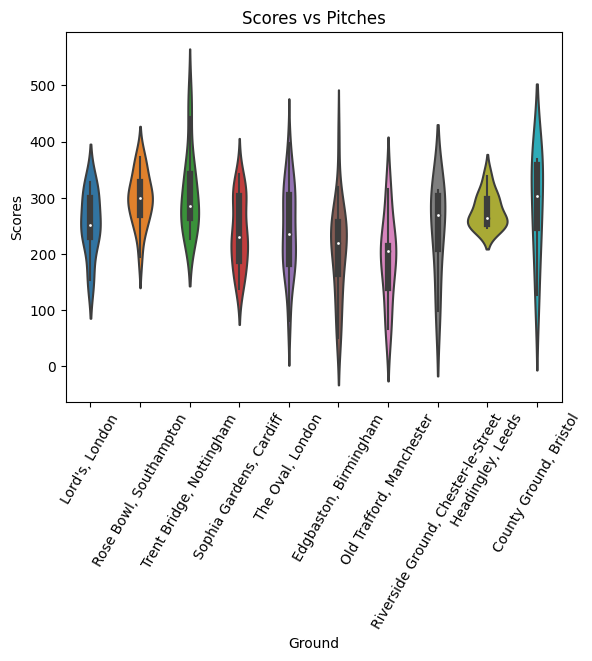

In [ ]:
Scores = [int(item[0]) for item in WC_grndhist.Score.str.split('/')]
WC_grndhist['Score_only'] = Scores
Ground_scores = WC_grndhist[['Score_only','Ground','Inns']]
Ground_scores = Ground_scores[Ground_scores.Score_only > 50]
plt.xticks(rotation=60)
sns.violinplot(x='Ground',y='Score_only',data=Ground_scores).set_title('Scores vs Pitches')
plt.ylabel('Scores')

Text(0, 0.5, 'Scores')

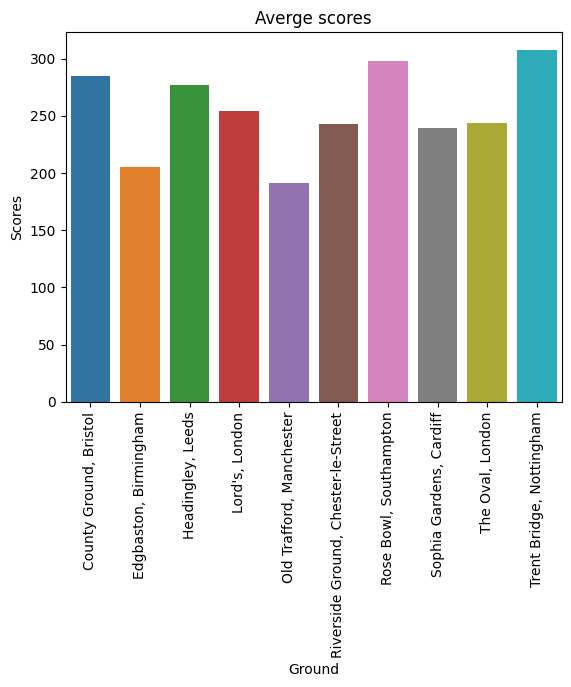

In [ ]:
#average scores in each grounds
Ground_scores = Ground_scores.groupby('Ground').mean().reset_index()
plt.xticks(rotation=90)
sns.barplot(x='Ground',y='Score_only',data=Ground_scores).set_title('Averge scores')
plt.ylabel('Scores')

Trent Bridge has the highest score average of 300, So favors bating. Old Trafford has the lowest around 200, favors bowling.

In [ ]:
#Wicket analysis in each pitchs
def no_of_wickets(value):
  if "/" not in value:
    return 10
  elif 'D' in value:
    return 0
  else: return int(value.split('/')[1])

Text(0.5, 1.0, 'Average wickets in each ground')

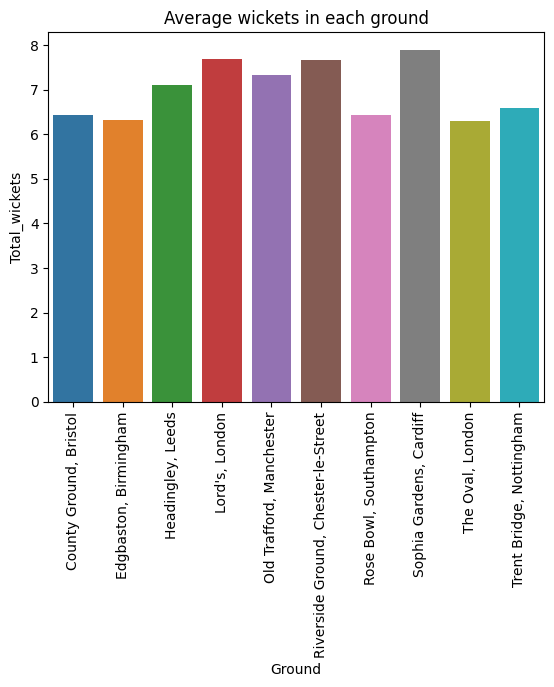

In [ ]:
WC_grndhist['Total_wickets'] = WC_grndhist.Score.apply(no_of_wickets)
Ground_wickets = WC_grndhist[['Total_wickets','Ground']]
Ground_wickets = Ground_wickets.groupby('Ground').mean().reset_index()
plt.xticks(rotation=90)
sns.barplot(x='Ground',y='Total_wickets',data=Ground_wickets).set_title('Average wickets in each ground')

all grounds have a average wicket falls around 6-7 in any innings.

In [ ]:
#Distributing the data based on each team and each WC ground
Grounds = WC_grndhist.Ground.unique()
WC_teams = WC_grndhist.Country.unique()
Ground_wins = {}
for Ground in Grounds:
  Ground_wins.update({Ground : {}})
  for Team in WC_teams:
    Country_grndrec = WC_grndhist[ (WC_grndhist.Country == Team)& (WC_grndhist.Ground == Ground)]
    matches_played = len(Country_grndrec)
    if matches_played == 0:
      continue
    matches_won = len(Country_grndrec[Country_grndrec.Result == 'won'])
    winning_percent = matches_won / matches_played * 100
    Ground_wins[Ground].update({Team: {"matches_played":matches_played,"matches_won":matches_won,"winning_percent":winning_percent}})
Ground_wins['Lord\'s, London']

{'Newzealad': {'matches_played': 1,
  'matches_won': 1,
  'winning_percent': 100.0},
 'England': {'matches_played': 7,
  'matches_won': 3,
  'winning_percent': 42.857142857142854},
 'SouthAfrica': {'matches_played': 1,
  'matches_won': 1,
  'winning_percent': 100.0},
 'India': {'matches_played': 1, 'matches_won': 0, 'winning_percent': 0.0},
 'Pakistan': {'matches_played': 1, 'matches_won': 0, 'winning_percent': 0.0},
 'Australia': {'matches_played': 1,
  'matches_won': 1,
  'winning_percent': 100.0},
 'SriLanka': {'matches_played': 1, 'matches_won': 1, 'winning_percent': 100.0}}

In [ ]:
#For each WC ground we can see the win percentage of each team
Data_frame = []
for Pitch, P_data in Ground_wins.items():
  for team, team_data in P_data.items():
    inside = []
    inside.extend([Pitch,team,team_data['matches_played'],team_data['matches_won'],team_data['winning_percent']])
    Data_frame.append(inside)

In [ ]:
Columns = ['Ground','Country','Played','Won','Win_percent']
Pitch_teamwins = pd.DataFrame(Data_frame, columns=Columns)

<Axes: xlabel='Ground', ylabel='Win_percent'>

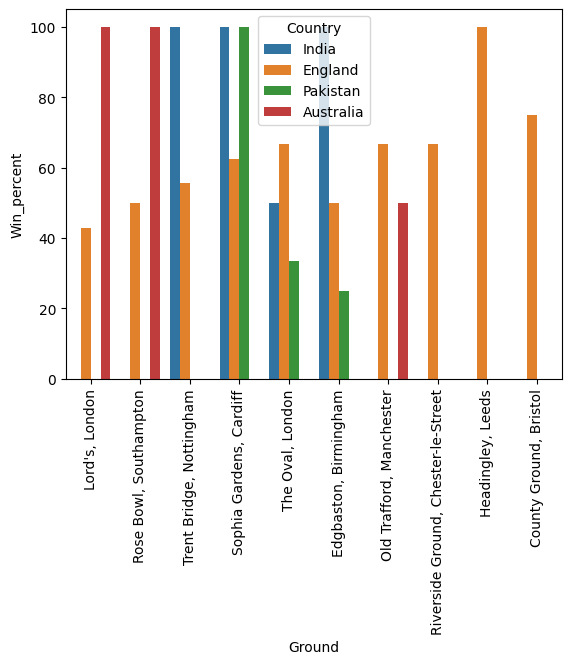

In [ ]:
plt.xticks(rotation=90)
sns.barplot(x='Ground',y='Win_percent',hue='Country',data=Pitch_teamwins, hue_order=['India','England','Pakistan','Australia'])

<Axes: xlabel='Ground', ylabel='Win_percent'>

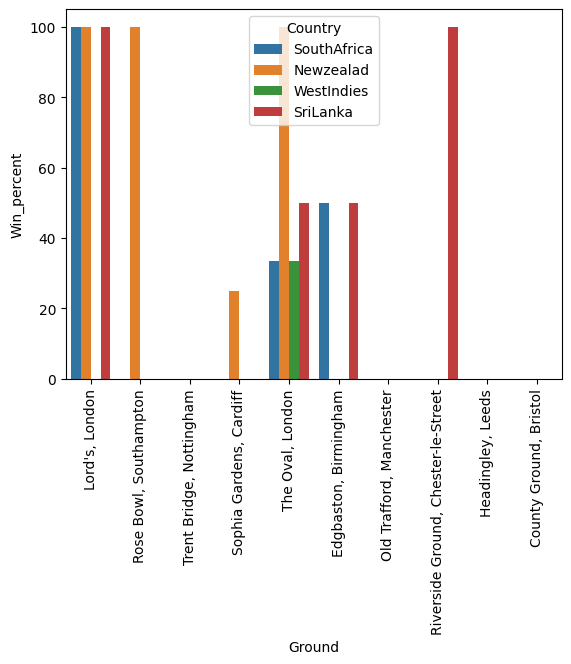

In [ ]:
plt.xticks(rotation=90)
sns.barplot(x='Ground',y='Win_percent',hue='Country',data=Pitch_teamwins, hue_order=['SouthAfrica','Newzealad','WestIndies','SriLanka'])

# Batsman Performance analysis
---
Average, Strike rate, highest fours and sixes

In [ ]:
Batsman_data.sample(5)

,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
1402,0,1,0.00,0,0,v New Zealand,Dunedin,23 Jan 2015,ODI # 3588,Thisara Perera,233514
8443,10,27,37.03,0,1,v Sri Lanka,Dhaka,27 Jan 2018,ODI # 3967,Mohammad Mithun,269237
1632,11,16,68.75,1,0,v Pakistan,Colombo (RPS),18 Jun 2012,ODI # 3277,Lahiru Thirimanne,301236
10559,4,5,80.00,0,0,v Ireland,Belfast,27 Aug 2018,ODI # 4032,Mujeeb Ur Rahman,974109
8520,6,6,100.00,0,0,v India,Dhaka,19 Feb 2011,ODI # 3100,Mahmudullah,56025


In [ ]:
#Extracting required data
Batsman_data.drop(columns=Batsman_data.columns[0],inplace=True)
Batsman_data = Batsman_data[~Batsman_data.Bat1.isin(['DNB','TDNB'])]
Batsman_data = Batsman_data[Batsman_data.Player_ID.isin(WC_Players.ID)]
stadiums = [item[0] for item in set(WC_Ground_stats)]
Batsman_datain_England = Batsman_data[Batsman_data.Ground.isin(stadiums)]

In [ ]:
def out_or_notout(value):
  if '*' in value:
    return 0
  else:
    return 1
Batsman_datain_England['Out_or_Notout']=Batsman_datain_England.Bat1.apply(out_or_notout)

In [ ]:
strike_type = ['Runs','BF','4s','6s']
for i in strike_type:
  Batsman_datain_England[i] = Batsman_datain_England[i].astype('int')
Batsman_datainfo = Batsman_datain_England
Batsman_datain_England = Batsman_datain_England.groupby(['Ground','Batsman']).sum().reset_index()

In [ ]:
Batsman_datain_England['Average'] = Batsman_datain_England['Runs'] / Batsman_datain_England.Out_or_Notout

In [ ]:
Batsman_datain_England.sort_values(by=['Average'],ascending=False).head()

,Ground,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_Notout,Average
369,Nottingham,Ravindra Jadeja,12,9,1,0,234675,0,inf
167,Chester-le-Street,Adil Rashid,12,9,2,0,244497,0,inf
389,Southampton,Chris Morris,35,22,3,2,439952,0,inf
146,Cardiff,Mosaddek Hossain,7,4,1,0,550133,0,inf
148,Cardiff,Nathan Coulter-Nile,7,6,1,0,261354,0,inf


In [ ]:
Batsman_Scores = Batsman_datain_England.groupby('Batsman').sum().reset_index()
Batsman_Scores['Average'] = Batsman_Scores['Runs'] / Batsman_Scores['Out_or_Notout']
Batsman_Scores.sort_values(by='Average',ascending=True).sample(5)

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_Notout,Average
82,Rohit Sharma,687,829,72,13,511530,12,57.250000
70,Moeen Ali,621,534,51,26,222925,19,32.684211
48,Junaid Khan,4,22,0,0,1038204,3,1.333333
69,Mitchell Starc,6,15,0,0,934776,3,2.000000
45,Joe Root,2375,2633,203,17,17612802,50,47.500000


In [ ]:
Best_batsman_avg = Batsman_Scores[(Batsman_Scores.Out_or_Notout > 0) & (Batsman_Scores.Average > 40)].sort_values(by='Average',ascending=False)
Best_batsman_avg

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_Notout,Average
35,Imam-ul-Haq,234,263,24,1,2273104,2,117.000000
25,Evin Lewis,200,152,18,9,1295703,2,100.000000
39,Jason Holder,152,121,10,7,1174455,2,76.000000
81,Ravindra Jadeja,281,258,29,5,2346750,4,70.250000
86,Sarfaraz Ahmed,465,502,38,1,2277600,7,66.428571
46,Jonny Bairstow,1439,1295,166,23,9220423,22,65.409091
92,Shikhar Dhawan,976,966,118,13,479995,15,65.066667
52,Kane Williamson,815,849,84,7,3890684,13,62.692308
82,Rohit Sharma,687,829,72,13,511530,12,57.250000
33,Hashim Amla,851,941,94,5,746402,15,56.733333


In [ ]:
#adding the respective country for the collection
WC_player_ID = Batsman_data[['Player_ID','Batsman']].drop_duplicates()

In [ ]:
# Merge WC_player_ID with Best_batsman_avg to get Player_ID
Player_ID = list(Best_batsman_avg.merge(WC_player_ID, how="left", on="Batsman")["Player_ID_y"].astype("int"))
Best_batsman_avg['Player_ID'] = Player_ID

# Rename columns in WC_Players to match Best_batsman_avg
WC_Players.columns = ['Player', 'Player_ID', 'Country']

# Merge WC_Players with Best_batsman_avg to create the 'Country' column
Best_batsman_avg = Best_batsman_avg.merge(WC_Players[['Player_ID', 'Country']], how="left", on="Player_ID")

Best_batsman_avg

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_Notout,Average,Country
0,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan
1,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies
2,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies
3,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India
4,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571,Pakistan
5,Jonny Bairstow,1439,1295,166,23,297433,22,65.409091,England
6,Shikhar Dhawan,976,966,118,13,28235,15,65.066667,India
7,Kane Williamson,815,849,84,7,277906,13,62.692308,NewZealand
8,Rohit Sharma,687,829,72,13,34102,12,57.250000,India
9,Hashim Amla,851,941,94,5,43906,15,56.733333,SouthAfrica


In [ ]:
#Best Batsman strike rate
Best_batsman_avg['Strike_rate'] = Best_batsman_avg['Runs'] / Best_batsman_avg['BF']*100
Best_batsman_avg.head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_Notout,Average,Country,Strike_rate
0,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan,88.973384
1,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947
2,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies,125.619835
3,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India,108.914729
4,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571,Pakistan,92.629482


In [ ]:
#Batsman with best strike rates
Best_batsman_avg.sort_values(['Strike_rate', 'Average'] , ascending=False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_Notout,Average,Country,Strike_rate
1,Evin Lewis,200,152,18,9,431901,2,100.0000,WestIndies,131.578947
2,Jason Holder,152,121,10,7,391485,2,76.0000,WestIndies,125.619835
14,Jos Buttler,1654,1358,147,47,308967,32,51.6875,England,121.796760
10,Fakhar Zaman,452,394,50,11,512191,8,56.5000,Pakistan,114.720812
21,Imad Wasim,224,200,22,5,227758,5,44.8000,Pakistan,112.000000


Text(0.5, 1.0, 'Team with most Best batsman')

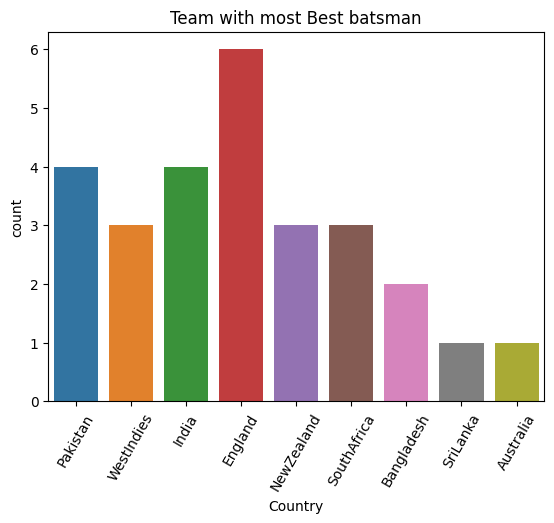

In [ ]:
#Country with hghest number of best batsman
plt.xticks(rotation=60)
sns.countplot(x=Best_batsman_avg['Country']).set_title('Team with most Best batsman')

England has the maximum number of best batsman in the given DataSet.

# Bowler performance analysis
---
Economy, Average, Strike-Rate, Maidens_percent, Maximum Wickets.

In [ ]:
Bowler_data.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [ ]:
#filtering bowler DataSet
Bowler_data = Bowler_data[Bowler_data.Ground.isin(stadiums)]
Bowler_data = Bowler_data[~Bowler_data.Overs.str.contains('-')]
Bowler_data.head(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
6,7,7.0,0,52,2,7.42,26.00,21.0,v England,The Oval,28 Jun 2011,ODI # 3165,Suranga Lakmal,49619
7,8,7.5,0,43,3,5.48,14.33,15.6,v England,Leeds,1 Jul 2011,ODI # 3167,Suranga Lakmal,49619
8,9,10.0,0,62,2,6.20,31.00,30.0,v England,Lord's,3 Jul 2011,ODI # 3168,Suranga Lakmal,49619
9,10,2.0,0,12,0,6.00,-,-,v England,Nottingham,6 Jul 2011,ODI # 3169,Suranga Lakmal,49619
26,27,6.0,0,34,0,5.66,-,-,v England,The Oval,22 May 2014,ODI # 3492,Suranga Lakmal,49619


In [ ]:
def overs_to_ball(value):
  if "." in value:
    over = value.split(".")
    return int(over[0])*6+int(over[1])
  else:
    return int(value)*6

In [ ]:
Bowler_data['Balls'] = Bowler_data.Overs.apply(overs_to_ball)
for i in ['Runs','Mdns','Wkts','Balls']:
  Bowler_data[i] = Bowler_data[i].astype('float')
Bowler_data.Ground = Bowler_data.Ground.apply(Full_Ground_names)
WC_bowlers_data = Bowler_data.groupby(['Bowler']).sum()[['Runs','Mdns','Wkts','Balls']].reset_index()

In [ ]:
WC_bowlers_data['Economy'] = WC_bowlers_data.Runs * 6 / WC_bowlers_data.Balls
WC_bowlers_data['Average'] = WC_bowlers_data.Runs / WC_bowlers_data.Wkts
WC_bowlers_data['Strike_Rate'] = WC_bowlers_data.Balls / WC_bowlers_data.Wkts
WC_bowlers_data.head()

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate
0,Aaron Finch,7.0,0.0,0.0,6.0,7.000000,inf,inf
1,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000
2,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333
3,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000
4,Andre Russell,43.0,0.0,0.0,36.0,7.166667,inf,inf


In [ ]:
#remove bolwers bowled less than 10 overs
WC_bowlers_data = WC_bowlers_data[(WC_bowlers_data.Balls > 36)&(WC_bowlers_data.Wkts > 0)]
WC_bowlers_data

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y
0,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000,379504,379504
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,244497
2,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000,540316,540316
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,49764
4,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000,315594,315594
...,...,...,...,...,...,...,...,...,...,...
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,232364
60,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286,550235,550235
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,277912
62,Virat Kohli,120.0,0.0,1.0,108.0,6.666667,120.000000,108.000000,253802,253802


In [ ]:
#Assigning Country to the each bowlers
Player_WC_ID = Bowler_data[['Player_ID','Bowler']].drop_duplicates()

Player_ID = list(WC_bowlers_data.merge(Player_WC_ID, how="left", on="Bowler")["Player_ID_y"].astype("int"))
WC_bowlers_data['Player_ID'] = Player_ID

# Rename columns in WC_Players to match Best_batsman_avg
WC_Players.columns = ['Player', 'Player_ID', 'Country']

# Merge WC_Players with Best_batsman_avg to create the 'Country' column
WC_bowlers_data = WC_bowlers_data.merge(WC_Players[['Player_ID', 'Country']], how="left", on="Player_ID")

WC_bowlers_data.iloc[57, -1] = 'SriLanka'
WC_bowlers_data

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country
0,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000,379504,379504,379504,Australia
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,244497,244497,England
2,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000,540316,540316,540316,SouthAfrica
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,49764,49764,SriLanka
4,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000,315594,315594,315594,WestIndies
...,...,...,...,...,...,...,...,...,...,...,...,...
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,232364,232364,NewZealand
60,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286,550235,550235,550235,England
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,277912,277912,NewZealand
62,Virat Kohli,120.0,0.0,1.0,108.0,6.666667,120.000000,108.000000,253802,253802,253802,India


In [ ]:
#Bowlers with most number of maidins in bowled overs
WC_bowlers_data['Maidens_percent'] = ((WC_bowlers_data.Mdns * 6) / (WC_bowlers_data.Balls))*100
WC_bowlers_data.sort_values(['Maidens_percent'], ascending=False).head()

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country,Maidens_percent
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.00,230553,230553,230553,WestIndies,25.000000
26,Kagiso Rabada,268.0,5.0,8.0,312.0,5.153846,33.500000,39.00,550215,550215,550215,SouthAfrica,9.615385
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.50,326016,326016,326016,India,9.523810
0,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.00,379504,379504,379504,Australia,8.108108
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.44,232364,232364,232364,NewZealand,7.884363


In [ ]:
#Bowlers with best Average
WC_bowlers_data.sort_values(['Average'])[:5]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country,Maidens_percent
31,Kuldeep Yadav,148.0,0.0,9.0,180.0,4.933333,16.444444,20.000000,559235,559235,559235,India,0.000000
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,481896,481896,India,3.076923
29,Kedar Jadhav,67.0,0.0,3.0,72.0,5.583333,22.333333,24.000000,290716,290716,290716,India,0.000000
44,Mosaddek Hossain,73.0,0.0,3.0,74.0,5.918919,24.333333,24.666667,550133,550133,550133,Bangladesh,0.000000
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,230553,230553,WestIndies,25.000000


In [ ]:
#Bowlers with best Economy
WC_bowlers_data.sort_values(['Economy'])[:5]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country,Maidens_percent
47,Nathan Lyon,70.0,0.0,1.0,102.0,4.117647,70.000000,102.000000,272279,272279,272279,Australia,0.000000
55,Shoaib Malik,376.0,3.0,11.0,504.0,4.476190,34.181818,45.818182,42657,42657,42657,Pakistan,3.571429
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,326016,326016,India,9.523810
63,Yuzvendra Chahal,135.0,0.0,2.0,180.0,4.500000,67.500000,90.000000,430246,430246,430246,India,0.000000
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,49764,49764,SriLanka,1.960784


In [ ]:
#Bowlers with best strike rate
WC_bowlers_data.sort_values(by=['Strike_Rate'])[:5]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country,Maidens_percent
31,Kuldeep Yadav,148.0,0.0,9.0,180.0,4.933333,16.444444,20.000000,559235,559235,559235,India,0.000000
29,Kedar Jadhav,67.0,0.0,3.0,72.0,5.583333,22.333333,24.000000,290716,290716,290716,India,0.000000
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,481896,481896,India,3.076923
44,Mosaddek Hossain,73.0,0.0,3.0,74.0,5.918919,24.333333,24.666667,550133,550133,550133,Bangladesh,0.000000
60,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286,550235,550235,550235,England,3.333333


In [ ]:
#Bowlers with most wickets
WC_bowlers_data.sort_values(by=['Wkts'], ascending=False)[:5]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country,Maidens_percent
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,244497,244497,England,0.755668
33,Liam Plunkett,2033.0,3.0,68.0,2071.0,5.889908,29.897059,30.455882,19264,19264,19264,England,0.869145
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,308251,308251,England,3.931204
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,49758,49758,SriLanka,6.394316
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,247235,247235,England,5.727924


### Countries with best Bowlers

In [ ]:
aggregations = {
    'Runs' : 'sum',
    'Mdns' : 'sum',
    'Wkts' : 'sum',
    'Balls': 'sum',
    'Economy': 'mean',
    'Average':'mean',
    'Strike_Rate':'mean',
    'Maidens_percent':'mean'
}
WC_bowlers_data_teamwise = WC_bowlers_data.groupby('Country').agg(aggregations).reset_index()
WC_bowlers_data_teamwise

,Country,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Maidens_percent
0,Australia,2175.0,12.0,60.0,2300.0,5.631351,42.014177,46.166234,3.249520
1,Bangladesh,1358.0,6.0,22.0,1484.0,5.778804,79.500000,81.583333,1.188119
2,England,11467.0,43.0,318.0,11942.0,5.920822,40.538542,41.417132,2.381099
3,India,2467.0,19.0,77.0,2901.0,5.255050,47.922222,52.581173,2.236536
4,NewZealand,1782.0,11.0,53.0,1769.0,6.263260,37.813667,35.754667,2.031418
5,Pakistan,2999.0,12.0,74.0,3366.0,6.028354,56.615722,54.646572,1.536407
6,SouthAfrica,1511.0,12.0,40.0,1681.0,5.552081,41.977381,45.035714,3.355573
7,SriLanka,2592.0,14.0,78.0,2721.0,5.701535,39.753114,42.422306,1.564634
8,WestIndies,885.0,6.0,21.0,969.0,5.903939,84.433333,76.683333,6.780035


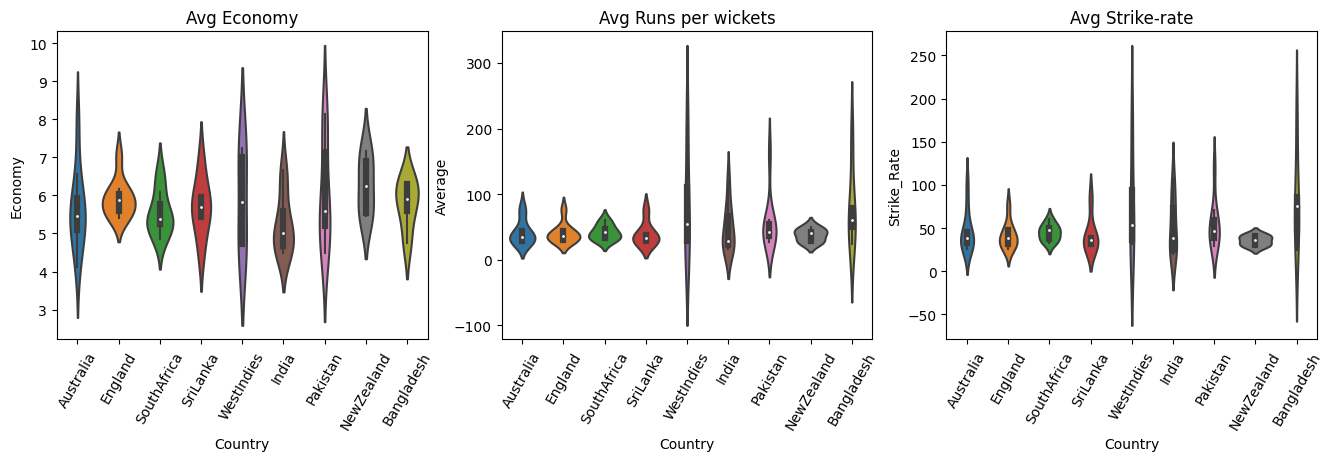

In [ ]:
plt.figure(figsize=[22,4])
plt.subplot(141);plt.xticks(rotation=60);sns.violinplot(x='Country',y='Economy',data=WC_bowlers_data);plt.title('Avg Economy');
plt.subplot(142);plt.xticks(rotation=60);sns.violinplot(x='Country',y='Average',data=WC_bowlers_data);plt.title('Avg Runs per wickets');
plt.subplot(143);plt.xticks(rotation=60);sns.violinplot(x='Country',y='Strike_Rate',data=WC_bowlers_data);plt.title('Avg Strike-rate');

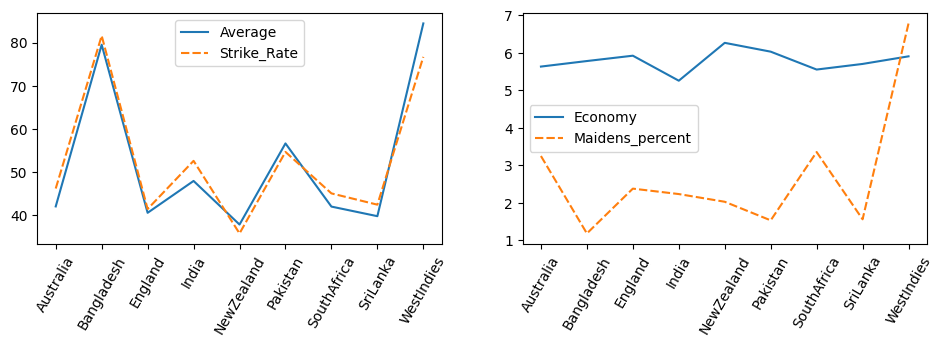

In [ ]:
plt.figure(figsize=(24,3))
plt.subplot(141);plt.xticks(rotation=60);g=sns.lineplot(data=WC_bowlers_data_teamwise[['Average', 'Strike_Rate']]);g.set_xticklabels(['Australia']+[item for item in WC_bowlers_data_teamwise.Country]);
plt.subplot(142);plt.xticks(rotation=60);g=sns.lineplot(data=WC_bowlers_data_teamwise[['Economy', 'Maidens_percent']]);g.set_xticklabels(['Australia']+[item for item in WC_bowlers_data_teamwise.Country]);

### it seems that west indies are drawing back in Average, Economy and Strike-rate and New Zealand have a better stats in bowling

In [ ]:
#Country with best bowlers
Best_bowlers_data = WC_bowlers_data[(WC_bowlers_data.Balls > 150) & \
                                    (WC_bowlers_data.Average < 40) & \
                                    (WC_bowlers_data.Strike_Rate < 40) & \
                                    (WC_bowlers_data.Economy < 7.5)]
Best_bowlers_data

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country,Maidens_percent
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,244497,244497,England,0.755668
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,49764,49764,SriLanka,1.960784
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,326016,326016,India,9.523810
7,Chris Gayle,446.0,2.0,15.0,566.0,4.727915,29.733333,37.733333,51880,51880,51880,WestIndies,2.120141
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,247235,247235,England,5.727924
10,Dale Steyn,324.0,3.0,10.0,364.0,5.340659,32.400000,36.400000,47492,47492,47492,SouthAfrica,4.945055
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,308251,308251,England,3.931204
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,681305,681305,Pakistan,2.702703
18,Imran Tahir,148.0,0.0,5.0,165.0,5.381818,29.600000,33.000000,40618,40618,40618,SouthAfrica,0.000000
22,Jeevan Mendis,170.0,0.0,6.0,174.0,5.862069,28.333333,29.000000,49700,49700,49700,SriLanka,0.000000


Text(0.5, 1.0, 'best bowlers in each team')

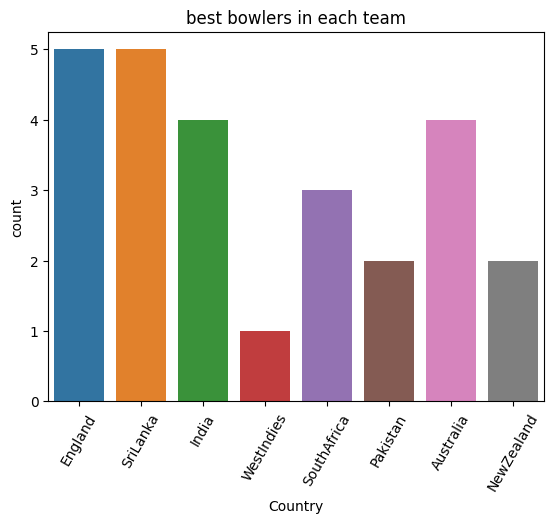

In [ ]:
plt.xticks(rotation=60)
sns.countplot(x=Best_bowlers_data['Country']).set_title('best bowlers in each team')

so England has the maximum best bowlers and West indies has the lest.

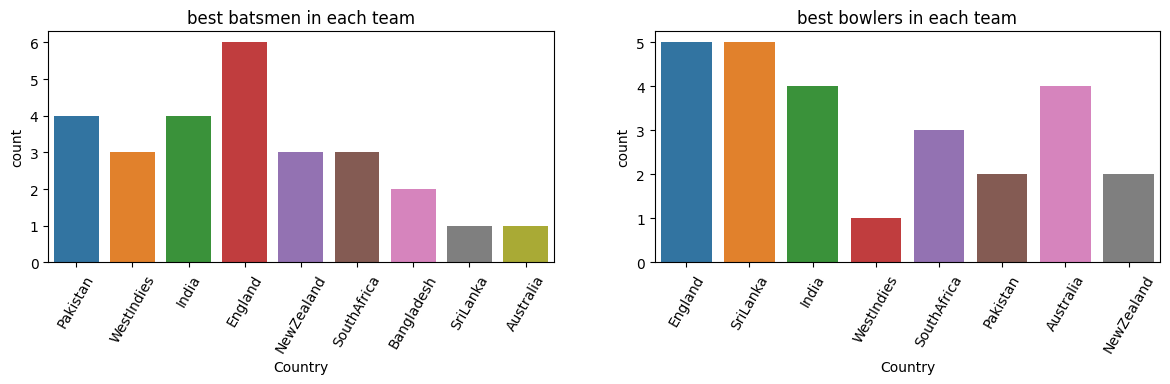

In [ ]:
plt.figure(figsize=(30,3))
plt.subplot(141);plt.xticks(rotation=60);sns.countplot(x=Best_batsman_avg['Country']).set_title('best batsmen in each team');
plt.subplot(142);plt.xticks(rotation=60);sns.countplot(x=Best_bowlers_data['Country']).set_title('best bowlers in each team');

As we can see England is the best cotender for the 2019 world cup with maximum best batsman and best bowlers. <br>Where as Bangladesh does not have a single bowler in best bowler list and quit less best batsmans.

# Best All Rounders Analysis
---

In [ ]:
Bowler_data = Bowler_data[Bowler_data.columns[1:]]
Bowler_data.columns = ['Overs', 'Maidens', 'Runs_Given', 'Wickets', 'Economy', 'Bowling_Average', 'Bowling_StrikeRate', 'Opposition','Ground', 'Start_Date', 'Match_ID', 'Player', 'Player_ID', 'Balls_Bowled']
Bowler_data.sample(5)

,Overs,Maidens,Runs_Given,Wickets,Economy,Bowling_Average,Bowling_StrikeRate,Opposition,Ground,Start_Date,Match_ID,Player,Player_ID,Balls_Bowled
3471,4.2,0.0,21.0,1.0,4.84,21.00,26.0,v England,"Trent Bridge, Nottingham",8 Sep 2006,ODI # 2411,Mohammad Hafeez,41434,26.0
7065,10.0,0.0,86.0,1.0,8.60,86.00,60.0,v Pakistan,"County Ground, Bristol",14 May 2019,ODI # 4135,David Willey,308251,60.0
9215,10.0,0.0,52.0,0.0,5.20,-,-,v New Zealand,"Sophia Gardens, Cardiff",9 Jun 2017,ODI # 3883,Shakib Al Hasan,56143,60.0
6982,10.0,2.0,43.0,1.0,4.30,43.00,60.0,v Pakistan,"Rose Bowl, Southampton",24 Aug 2016,ODI # 3770,Chris Woakes,247235,60.0
7020,10.0,0.0,67.0,4.0,6.70,16.75,15.0,v Pakistan,"County Ground, Bristol",14 May 2019,ODI # 4135,Chris Woakes,247235,60.0


In [ ]:
# Batsman_datainfo.Ground = Batsman_datainfo.Ground.apply(Full_Ground_names)
Batsman_datainfo = Batsman_datainfo[['Runs','BF','SR','4s','6s','Match_ID','Player_ID','Out_or_Notout']]
Batsman_datainfo.columns = ['Runs_scored','Balls_faced','Batting_strikerate','4s','6s','Match_ID','Player_ID','Out_or_Notout']
Batsman_datainfo.sample(5)

,Runs_scored,Balls_faced,Batting_strikerate,4s,6s,Match_ID,Player_ID,Out_or_Notout
7248,33,50,66.00,1,0,ODI # 3362,303669,1
9037,95,114,83.33,6,3,ODI # 3879,56194,1
7188,0,2,0.00,0,0,ODI # 3771,298438,1
3714,3,11,27.27,0,0,ODI # 4130,512191,1
7649,17,18,94.44,1,1,ODI # 3682,297433,1


In [ ]:
All_rounders_data = Bowler_data.merge(Batsman_datainfo,on=['Match_ID','Player_ID'])
All_rounders_data.sample(5)

,Overs,Maidens,Runs_Given,Wickets,Economy,Bowling_Average,Bowling_StrikeRate,Opposition,Ground,Start_Date,Match_ID,Player,Player_ID,Balls_Bowled,Runs_scored,Balls_faced,Batting_strikerate,4s,6s,Out_or_Notout
92,2.0,0.0,19.0,0.0,9.50,-,-,v England,"County Ground, Bristol",14 May 2019,ODI # 4135,Haris Sohail,318788,12.0,41,41,100.00,7,0,1
39,9.5,2.0,52.0,1.0,5.28,52.00,59.0,v Pakistan,"Sophia Gardens, Cardiff",12 Jun 2017,ODI # 3888,Lasith Malinga,49758,59.0,9,14,64.28,0,0,0
311,3.0,0.0,18.0,0.0,6.00,-,-,v South Africa,"Rose Bowl, Southampton",27 May 2017,ODI # 3873,Joe Root,303669,18.0,39,41,95.12,6,0,1
37,10.0,2.0,52.0,3.0,5.20,17.33,20.0,v England,"Lord's, London",31 May 2014,ODI # 3495,Lasith Malinga,49758,60.0,0,0,-,0,0,0
415,4.0,0.0,17.0,0.0,4.25,-,-,v England,"Headingley, Leeds",11 Sep 2015,ODI # 3683,Marcus Stoinis,325012,24.0,4,5,80.00,0,0,1


In [ ]:
#Allrounders should have bowled and batted in same match.
All_rounders_data = All_rounders_data.groupby(['Player_ID','Player']).sum().reset_index()
All_rounders_data.sample(5)

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_scored,Balls_faced,4s,6s,Out_or_Notout
70,625383,Jasprit Bumrah,0.0,68.0,0.0,54.0,1,9,0,0,1
47,325026,Glenn Maxwell,0.0,253.0,6.0,282.0,299,263,30,9,8
36,277912,Trent Boult,0.0,139.0,6.0,144.0,0,2,0,0,1
49,330902,Mustafizur Rahman,0.0,27.0,0.0,30.0,1,4,0,0,0
75,922943,Shadab Khan,0.0,52.0,1.0,60.0,14,16,1,1,0


In [ ]:
All_rounders_data['Economy']= All_rounders_data.Runs_Given * 6 / All_rounders_data.Balls_Bowled
All_rounders_data['Bowling_strikerate'] = All_rounders_data.Runs_Given/All_rounders_data.Wickets
All_rounders_data['Bowling_average'] = All_rounders_data.Balls_Bowled / All_rounders_data.Wickets

All_rounders_data['Batting_average'] = All_rounders_data.Runs_scored/All_rounders_data.Out_or_Notout
All_rounders_data['Batting_strikerate'] = All_rounders_data.Runs_scored*100/All_rounders_data.Balls_faced
All_rounders_data.sample(5)

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_scored,Balls_faced,4s,6s,Out_or_Notout,Economy,Bowling_strikerate,Bowling_average,Batting_average,Batting_strikerate
42,311592,Mitchell Starc,0.0,206.0,3.0,180.0,6,15,0,0,3,6.866667,68.666667,60.00,2.000000,40.000000
13,49764,Angelo Mathews,1.0,204.0,8.0,270.0,465,559,38,5,8,4.533333,25.500000,33.75,58.125000,83.184258
17,56143,Shakib Al Hasan,0.0,318.0,4.0,342.0,166,204,16,1,6,5.578947,79.500000,85.50,27.666667,81.372549
68,559235,Kuldeep Yadav,0.0,68.0,3.0,60.0,8,26,0,0,0,6.800000,22.666667,20.00,inf,30.769231
69,625371,Hardik Pandya,1.0,256.0,4.0,243.0,147,97,7,10,4,6.320988,64.000000,60.75,36.750000,151.546392


In [ ]:
Best_allrounders = All_rounders_data[(All_rounders_data.Balls_Bowled > 120) & (All_rounders_data.Economy < 7) & (All_rounders_data.Bowling_average < 70) & (All_rounders_data.Batting_strikerate > 70) & (All_rounders_data.Batting_average > 35)]
Best_allrounders

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_scored,Balls_faced,4s,6s,Out_or_Notout,Economy,Bowling_strikerate,Bowling_average,Batting_average,Batting_strikerate
13,49764,Angelo Mathews,1.0,204.0,8.0,270.0,465,559,38,5,8,4.533333,25.500000,33.750000,58.125000,83.184258
20,227758,Imad Wasim,1.0,429.0,7.0,460.0,224,200,22,5,5,5.595652,61.285714,65.714286,44.800000,112.000000
25,234675,Ravindra Jadeja,1.0,460.0,13.0,456.0,281,258,29,5,4,6.052632,35.384615,35.076923,70.250000,108.914729
35,277906,Kane Williamson,0.0,256.0,6.0,246.0,440,458,43,3,8,6.243902,42.666667,41.000000,55.000000,96.069869
41,311158,Ben Stokes,1.0,1097.0,28.0,1057.0,1048,1095,88,30,23,6.227058,39.178571,37.750000,45.565217,95.707763
47,325026,Glenn Maxwell,0.0,253.0,6.0,282.0,299,263,30,9,8,5.382979,42.166667,47.000000,37.375000,113.688213
54,391485,Jason Holder,0.0,151.0,2.0,132.0,152,121,10,7,2,6.863636,75.500000,66.000000,76.000000,125.619835
69,625371,Hardik Pandya,1.0,256.0,4.0,243.0,147,97,7,10,4,6.320988,64.000000,60.750000,36.750000,151.546392


In [ ]:
WC_Players = WC_Players[['Player','Player_ID','Country']]
WC_Players.columns = ['Player','Player_ID','Country']
Best_allrounders = Best_allrounders.merge(WC_Players[['Player_ID', 'Country']], how="left", on="Player_ID")

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_scored,Balls_faced,4s,6s,Out_or_Notout,Economy,Bowling_strikerate,Bowling_average,Batting_average,Batting_strikerate,Country
0,49764,Angelo Mathews,1.0,204.0,8.0,270.0,465,559,38,5,8,4.533333,25.500000,33.750000,58.125000,83.184258,SriLanka
1,227758,Imad Wasim,1.0,429.0,7.0,460.0,224,200,22,5,5,5.595652,61.285714,65.714286,44.800000,112.000000,Pakistan
2,234675,Ravindra Jadeja,1.0,460.0,13.0,456.0,281,258,29,5,4,6.052632,35.384615,35.076923,70.250000,108.914729,India
3,277906,Kane Williamson,0.0,256.0,6.0,246.0,440,458,43,3,8,6.243902,42.666667,41.000000,55.000000,96.069869,NewZealand
4,311158,Ben Stokes,1.0,1097.0,28.0,1057.0,1048,1095,88,30,23,6.227058,39.178571,37.750000,45.565217,95.707763,England
5,325026,Glenn Maxwell,0.0,253.0,6.0,282.0,299,263,30,9,8,5.382979,42.166667,47.000000,37.375000,113.688213,Australia
6,391485,Jason Holder,0.0,151.0,2.0,132.0,152,121,10,7,2,6.863636,75.500000,66.000000,76.000000,125.619835,WestIndies
7,625371,Hardik Pandya,1.0,256.0,4.0,243.0,147,97,7,10,4,6.320988,64.000000,60.750000,36.750000,151.546392,India


Text(0.5, 1.0, 'Best All rounders in each country')

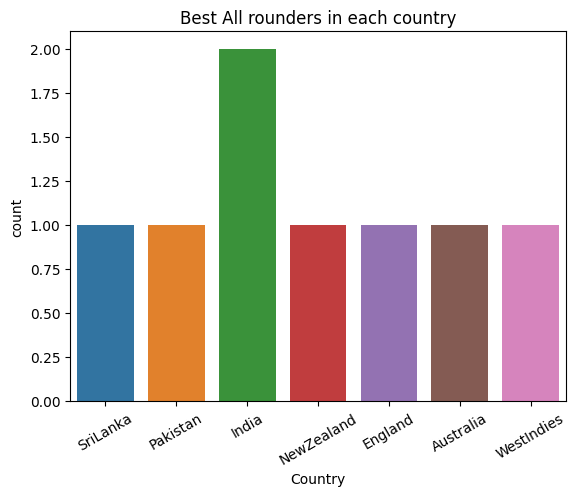

In [ ]:
plt.xticks(rotation=30)
sns.countplot(x=Best_allrounders['Country'])
plt.title('Best All rounders in each country')

India has comparitively more best all rounders according to the DataSet.

# Model Training for predicting Batsman performance
---
To predict a player performance there are mulitiple factors we can demonstrate prediction by selecting one of the factore, I consider Batting average is an important factor for a batsman in One Day Cricket.

In [ ]:
X = Best_batsman_avg.drop(columns=['Average','Batsman','Country'])
y = Best_batsman_avg['Average']

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

In [ ]:
#Evaluting the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 126.88673364770955
R-squared: 0.5731314357739283


As expected, Predicting cricket player performance using machine learning models can be challenging and has limitations due to the dynamic and multifaceted nature of the sport.<br>
some important reasons why relying solely on machine learning model for cricket player perfomance prediction may not always be a good idea.<br>
* Dynamic Nature of the game.
* Impact current external factors.
* Non-Linear Relationship
* Player skill progression


## Conclusion of the Analysis.
---
I here by conclude insted of predicting the individual player performance, we consider the over all analysis to predict the performanc of the entire Team and chance of winning the World Cup.
<br> As per given DataSet we have go to know by the analysis that England has best to chance to win the 2019 World Cup with maximum number of <i>Best_batsman</i>, <i>Best_bowlers</i> and decent <i>Best_all_rounder</i>.Also India and South Africa are also a tough competitors for England with decent stats in 2019 World cup venues as per the DataSet